## Classification breast-cancer.csv Metode KNN Kel_6
2009106052 Muhammad Reyhan Setiawan

2009106093 Dimas Yudhaputra Hemi S

2009106095 Muhammad Sultan Naufal

2009106091 Muhammad Fachrul Rozy

## Import Package -------------------------------------------------------------------------
Import Package yang diperlukan untuk Dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Cleaning#
from sklearn.impute import SimpleImputer

#Classifikasi KNN#
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Data Encoding#
from sklearn.preprocessing import OrdinalEncoder

## Exploratory data analysis -------------------------------------------------------------------------

Melihat dan mengeksplorasi data untuk mendapatkan wawasan tentang data. dengan begitu kita dapat memahami data lebih baik.

In [25]:
# Import Dataset
df = pd.read_csv('breast-cancer.csv')
# melihat dataset
df.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [26]:
# melihat ukuran dataset
df.shape

(286, 10)

In [27]:
# melihat type type data dalam dataset
df.dtypes

Class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [28]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [29]:
# Melihat ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [30]:
# Distribusi frekuensi nilai dalam variabel
for var in df.columns:
    print(df[var].value_counts())

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64
premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64
no     222
yes     56
?        8
Name: node-caps, dtype: int64
2    130
3     85
1     71
Name: deg-malig, dtype: int64
left     152
right    134
Name: breast, dtype: int64
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64
no     218
yes     68
Name: irradiat, dtype: int64


# -------------------------------------Data Preprocessing-------------------------------------
Data preprocessing adalah teknik yang digunakan untuk mengubah data mentah dalam format yang berguna dan efisien. Hal ini diperlukan karena data mentah seringkali tidak lengkap dan memiliki format yang tidak konsisten.

## Data Cleaning -------------------------------------------------------------------------
Data yang kita gunakan bisa jadi sangat berantakan. Ada informasi yang tak
lengkap, ada pula format yang berbeda-beda.Semua ini tentu membuat data itu sulit diolah, dengan begitu kita akan melihat dan membersihkan data jika ada yang kurang atau berantakan.

In [31]:
imputer_mean = SimpleImputer(strategy='mean')

In [32]:
# Melihat nilai yang hilang dalam variabel
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

Karena dataset bersih, maka tidak perlu di Data Cleaning

### Mean

In [33]:
# df.dropna(inplace=True)
# df.isna().sum()

### Data Duplikat 
Nilai duplikat dapat membuat sebaran datacondong kedalam suatu nilai yang dapat mengacaukan hasil analisis Dataset.

In [34]:
# Melihat data yang duplikat dalam dataset
df.duplicated().sum()

14

In [35]:
# Membersih kan data duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Data Encoding -------------------------------------------------------------------------
Teknik Encoding adalah teknik yang di gunakan untuk mengubah variabel kategorikal menjadi variabel numerik.

##### Ordinal Ecoding

In [36]:
encoder_ordinal = OrdinalEncoder()

#encoding
df['Class'] = encoder_ordinal.fit_transform(df[['Class']])
df['age'] = encoder_ordinal.fit_transform(df[['age']])
df['menopause'] = encoder_ordinal.fit_transform(df[['menopause']])
df['tumor-size'] = encoder_ordinal.fit_transform(df[['tumor-size']])
df['inv-nodes'] = encoder_ordinal.fit_transform(df[['inv-nodes']])
df['node-caps'] = encoder_ordinal.fit_transform(df[['node-caps']])
df['deg-malig'] = encoder_ordinal.fit_transform(df[['deg-malig']])
df['breast'] = encoder_ordinal.fit_transform(df[['breast']])
df['breast-quad'] = encoder_ordinal.fit_transform(df[['breast-quad']])
df['irradiat'] = encoder_ordinal.fit_transform(df[['irradiat']])
df.head

<bound method NDFrame.head of      Class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  \
0      0.0  1.0        2.0         5.0        0.0        1.0        2.0   
1      0.0  2.0        2.0         3.0        0.0        1.0        1.0   
2      0.0  2.0        2.0         3.0        0.0        1.0        1.0   
3      0.0  4.0        0.0         2.0        0.0        1.0        1.0   
4      0.0  2.0        2.0         0.0        0.0        1.0        1.0   
..     ...  ...        ...         ...        ...        ...        ...   
281    1.0  1.0        2.0         5.0        0.0        1.0        1.0   
282    1.0  1.0        2.0         3.0        0.0        1.0        2.0   
283    1.0  4.0        0.0         3.0        0.0        1.0        0.0   
284    1.0  2.0        0.0         5.0        4.0        1.0        2.0   
285    1.0  3.0        0.0         5.0        4.0        1.0        2.0   

     breast  breast-quad  irradiat  
0       0.0          2.0       0

In [37]:
# Melihat type type data yang terubah
df.dtypes

Class          float64
age            float64
menopause      float64
tumor-size     float64
inv-nodes      float64
node-caps      float64
deg-malig      float64
breast         float64
breast-quad    float64
irradiat       float64
dtype: object

## Data Split  -------------------------------------------------------------------------
Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu.

In [38]:
x = df.iloc[:,:-1] # Target
y = df.iloc[:,-1] # Feature

In [39]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
# Melihat bentuk X_train dan X_test
x_train.shape, x_test.shape

((217, 9), (55, 9))

In [41]:
# Melihat bentuk Y_train dan Y_test
y_train.shape, y_test.shape

((217,), (55,))

## ---------------------------Classification, KNN (K-NEAREST NEIGHBOUR)------------------------------------
K-Nearest Neighbour atau algoritma KNN menggunakan algoritma non-parametrik yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. Algoritma KNN mengasumsikan bahwa titik data yang serupa akan selalu bisa
ditemukan di sekitarnya.

In [45]:
df.head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0.0,1.0,2.0,5.0,0.0,1.0,2.0,0.0,2.0,0.0
1,0.0,2.0,2.0,3.0,0.0,1.0,1.0,1.0,5.0,0.0
2,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0
3,0.0,4.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0
4,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        272 non-null    float64
 1   age          272 non-null    float64
 2   menopause    272 non-null    float64
 3   tumor-size   272 non-null    float64
 4   inv-nodes    272 non-null    float64
 5   node-caps    272 non-null    float64
 6   deg-malig    272 non-null    float64
 7   breast       272 non-null    float64
 8   breast-quad  272 non-null    float64
 9   irradiat     272 non-null    float64
dtypes: float64(10)
memory usage: 23.4 KB


In [47]:

x = df[['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']]
y = df['irradiat']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.2)

In [48]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [49]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
predicted_value = classifier.predict(x_test)
accuracy = accuracy_score(y_test, predicted_value)

In [51]:
print(f'hasil prediksi: {predicted_value}',
     f'Class: {y_test}',
     f'akurasi: {accuracy}',
     sep = '\n'
)

hasil prediksi: [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Class: 228    0.0
271    1.0
212    0.0
118    0.0
249    0.0
170    1.0
92     0.0
192    0.0
56     0.0
256    1.0
221    0.0
183    1.0
220    0.0
134    1.0
101    0.0
15     0.0
8      0.0
161    0.0
60     0.0
186    0.0
46     0.0
124    0.0
218    0.0
169    1.0
64     0.0
7      0.0
95     0.0
246    1.0
211    0.0
266    0.0
153    1.0
126    0.0
107    0.0
200    0.0
74     0.0
146    1.0
241    0.0
85     0.0
65     0.0
270    0.0
105    0.0
210    0.0
181    1.0
110    0.0
28     0.0
234    1.0
198    1.0
191    1.0
229    1.0
38     0.0
253    0.0
145    1.0
20     0.0
77     0.0
178    1.0
Name: irradiat, dtype: float64
akurasi: 0.6909090909090909


In [52]:
classifier.score(x_test,y_test)

0.6909090909090909

##  -----------------------------------------------Visualisasi Data --------------------------------------------------------
setelah, kita memiliki pemahaman dasar tentang data breast-cancer. saatnya melengkapinya dengan beberapa visualisasi data untuk mendapatkan pemahaman yang lebih baik tentang data breast-cancer.

### Grafik Batang


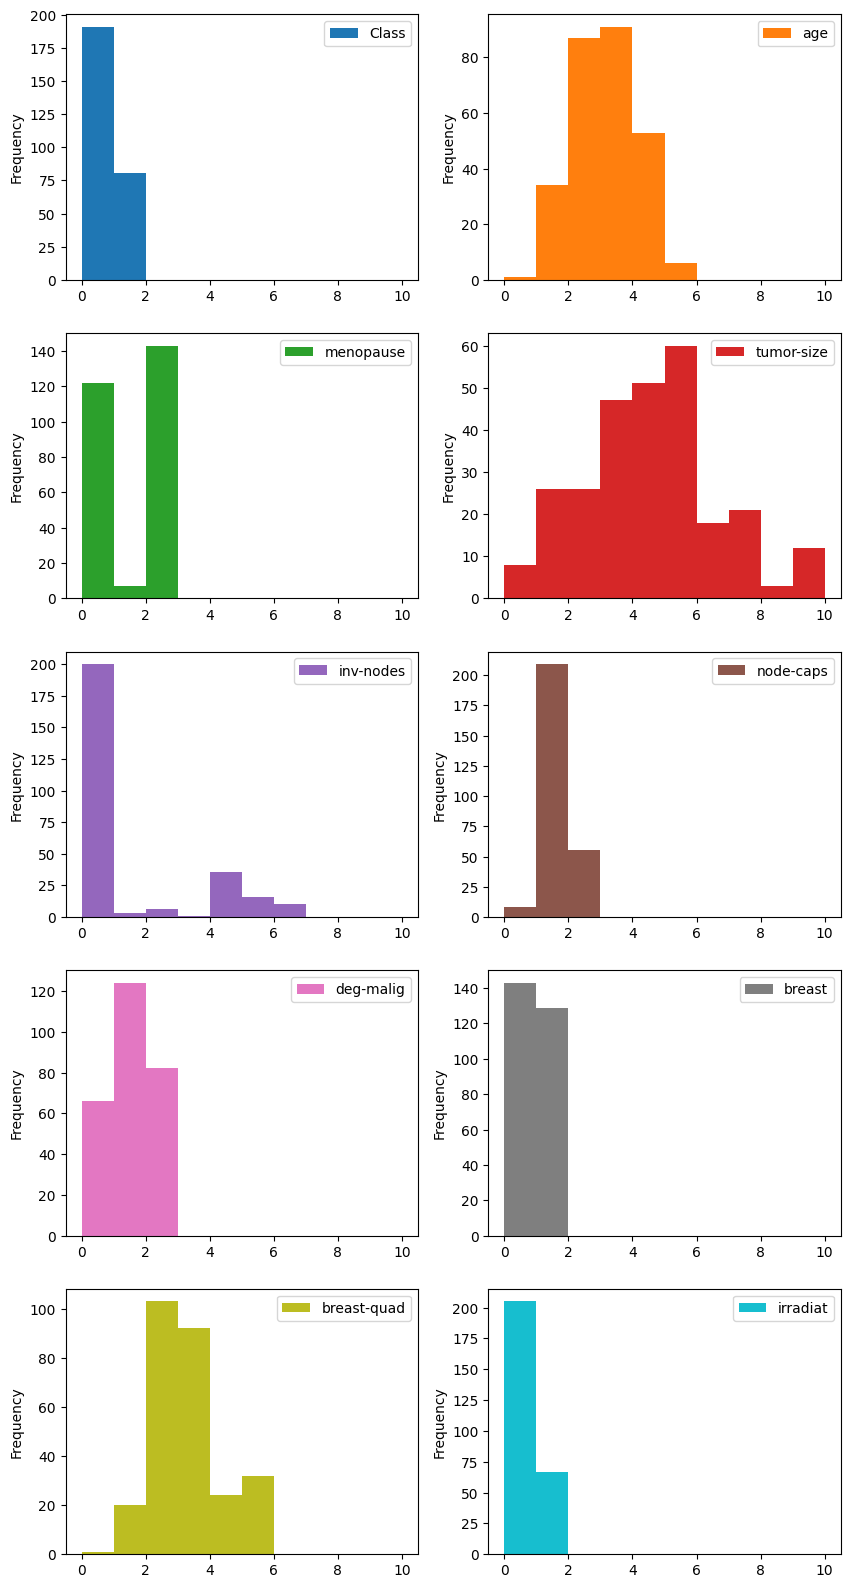

In [60]:
# plot histograms of the variables
plt.rcParams['figure.figsize']=(10,20)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

### Grafik Heatmap
pada heatmap semakin tinggi angka suatu kelompok data maka warnanya akan semakin gelap. Grafik ini digunakan untuk menunjukkan korelasi antar variable.

In [61]:
correlation = df.corr()

In [62]:
# data di sort untuk jasil yang lebih akurat
correlation['Class'].sort_values(ascending=False)

Class          1.000000
inv-nodes      0.288542
deg-malig      0.286857
node-caps      0.232750
irradiat       0.187485
tumor-size     0.104562
menopause      0.038779
breast-quad    0.031105
breast        -0.054991
age           -0.058178
Name: Class, dtype: float64

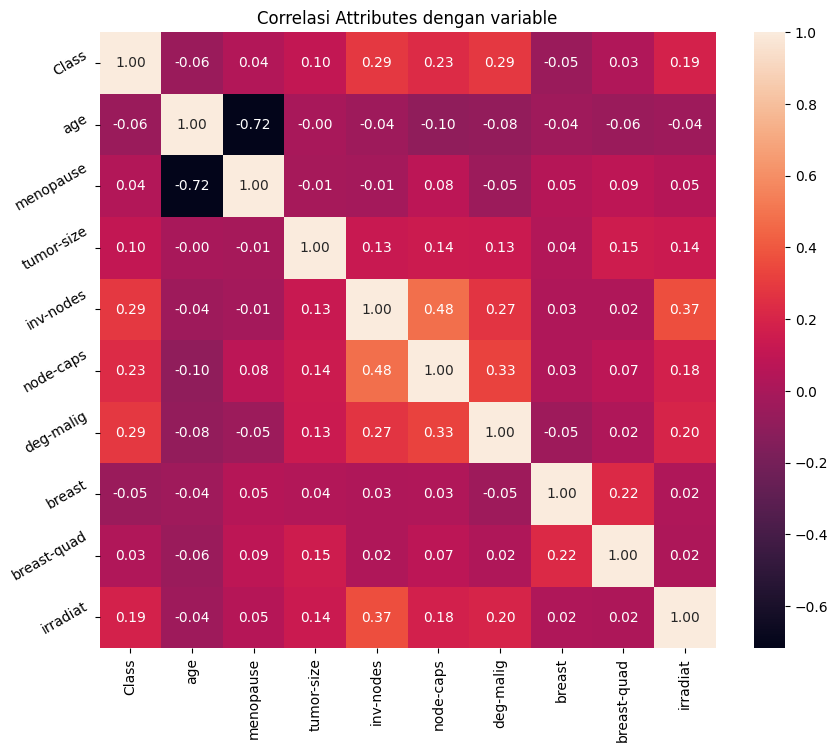

In [63]:
plt.figure(figsize=(10,8))
plt.title('Correlasi Attributes dengan variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# ----------------------------------------------END--------------------------------------------------------